## 0.0 - Imports 


In [98]:
# --- Imports --- #
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

import graphviz

# --- Settings --- #
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

## 0.1 - Load Data

In [3]:
# --- Load Data --- #
dataframe = pd.read_csv('https://raw.githubusercontent.com/bert-bruno/case_miw/refs/heads/main/data/pre_processed_data_pre_clustering.csv')
# ---
dataframe.head() # Display the first 5 rows of the dataframe

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age,Batch,Age_Range
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,57,1,50-78
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,60,3,50-78
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,49,2,39-50
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,30,3,18-39
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,33,3,18-39


In [4]:
# --- Check dataframe information --- #
dataframe.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2208 non-null   object 
 1   Marital_Status       2208 non-null   object 
 2   Income               2208 non-null   float64
 3   Kidhome              2208 non-null   int64  
 4   Teenhome             2208 non-null   int64  
 5   Recency              2208 non-null   int64  
 6   MntWines             2208 non-null   int64  
 7   MntFruits            2208 non-null   int64  
 8   MntMeatProducts      2208 non-null   int64  
 9   MntFishProducts      2208 non-null   int64  
 10  MntSweetProducts     2208 non-null   int64  
 11  MntGoldProds         2208 non-null   int64  
 12  NumDealsPurchases    2208 non-null   int64  
 13  NumWebPurchases      2208 non-null   int64  
 14  NumCatalogPurchases  2208 non-null   int64  
 15  NumStorePurchases    2208 non-null   i

## 0.2 - Categorical Features Encoding

In [5]:
# --- One Hot Encoding --- #
dataframe_categorical = dataframe[['Education', 'Marital_Status']] # Selecting the categorical columns.
dataframe = dataframe.drop(columns=['Education', 'Marital_Status']) # Dropping the categorical columns from original dataframe.
# ---
encoder = OneHotEncoder() # Creating the encoder object.
dummy_array = encoder.fit_transform(dataframe_categorical).toarray() # Encoding the categorical columns.
# ---
dataframe_categorical_dummy = pd.DataFrame(dummy_array, 
                                           columns=encoder.get_feature_names_out(
                                            ['Education', 'Marital_Status'])) # Creating a dataframe from the encoded array.
# ---
dataframe_dummy = pd.concat([dataframe, dataframe_categorical_dummy], axis=1) # Concatenating the original dataframe with the encoded dataframe.
dataframe_dummy = dataframe_dummy.drop(columns=['Age_Range'])
# ---
dataframe_dummy.head() # Display the first 5 rows of the dataframe

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age,Batch,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,57,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,60,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,49,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,30,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,33,3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


## 0.3 - Scaling Features

In [6]:
# --- Standardization --- #
scaler = StandardScaler() # Creating the scaler object.
dataframe_scaled = pd.DataFrame(scaler.fit_transform(dataframe_dummy), columns=dataframe_dummy.columns) # Standardizing the dataframe.
# ---
dataframe_scaled.head() # Display the first 5 rows of the dataframe

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age,Batch,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,0.309625,-0.824004,-0.929587,0.309118,0.977018,1.553315,1.689944,2.464405,1.482521,0.858552,0.352174,1.427120,2.506603,-0.555083,0.692301,-0.282324,-0.283258,-0.279508,-0.26118,-0.117363,2.381322,1.017915,-1.502099,-0.313859,-0.158334,0.990983,-0.444294,-0.525643,-0.341824,-0.796458,1.915222,-0.590600,-0.188805
1,-0.258381,1.038228,0.907950,-0.382230,-0.871705,-0.636864,-0.717917,-0.651086,-0.634157,-0.733610,-0.167612,-1.125249,-0.570823,-1.169892,-0.133077,-0.282324,-0.283258,-0.279508,-0.26118,-0.117363,-0.419935,1.274437,1.417474,-0.313859,-0.158334,0.990983,-0.444294,-0.525643,-0.341824,-0.796458,1.915222,-0.590600,-0.188805
2,0.958589,-0.824004,-0.929587,-0.797039,0.357814,0.571511,-0.178378,1.346494,-0.147565,-0.034612,-0.687398,1.427120,-0.228887,1.289346,-0.545767,-0.282324,-0.283258,-0.279508,-0.26118,-0.117363,-0.419935,0.333858,-0.042313,-0.313859,-0.158334,0.990983,-0.444294,-0.525643,-0.341824,-0.796458,-0.522133,1.693192,-0.188805
3,-1.207049,1.038228,-0.929587,-0.797039,-0.871705,-0.561341,-0.655491,-0.504474,-0.585498,-0.753027,-0.167612,-0.760624,-0.912759,-0.555083,0.279612,-0.282324,-0.283258,-0.279508,-0.26118,-0.117363,-0.419935,-1.290779,1.417474,-0.313859,-0.158334,0.990983,-0.444294,-0.525643,-0.341824,-0.796458,-0.522133,1.693192,-0.188805
4,0.317090,1.038228,-0.929587,1.553545,-0.391748,0.420464,-0.218509,0.155277,-0.001587,-0.558861,1.391746,0.333248,0.113050,0.059727,-0.133077,-0.282324,-0.283258,-0.279508,-0.26118,-0.117363,-0.419935,-1.034258,1.417474,-0.313859,-0.158334,-1.009099,-0.444294,1.902432,-0.341824,1.255559,-0.522133,-0.590600,-0.188805


## 1.0 - PCA

In [84]:
# --- Principal Component Analysis --- #
pca = PCA(n_components=3) # Creating the PCA object.
dataframe_pca = pca.fit_transform(dataframe_scaled) # Applying PCA to the standardized dataframe.

## 2.0 - KMeans Clustering

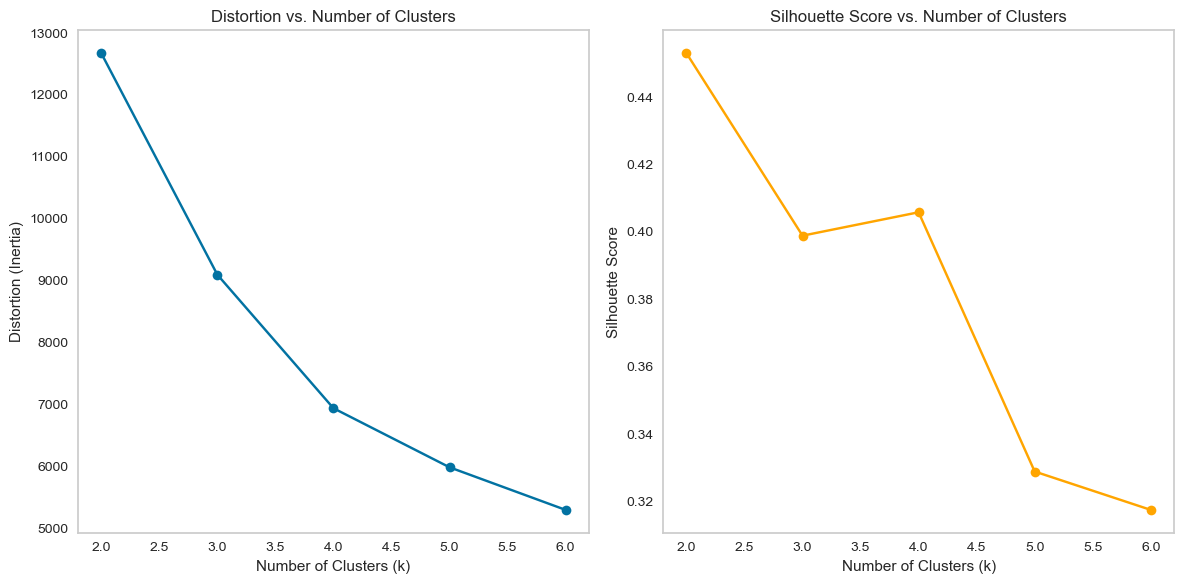

In [86]:
max_k = 6  # Set the maximum number of clusters to evaluate
distortions = []
silhouette_scores = []

# Iterate over different numbers of clusters (k values)
for k in range(2, max_k + 1):  # Starting from 2 for silhouette score
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dataframe_pca)
    # ---
    # Get the distortion (inertia)
    distortions.append(kmeans.inertia_)
    # ---
    if k > 1:  # Silhouette score is not defined for k=1
        silhouette_avg = silhouette_score(dataframe_pca, kmeans.labels_) # Calculate the silhouette score
        silhouette_scores.append(silhouette_avg) # Append the silhouette score
    else:
        silhouette_scores.append(-1)  # Assign a default value for k=1
# --- Visualizing the Elbow Method --- #
plt.figure(figsize=(12, 6)) # Create a new figure to plot both metrics
# -- Plot distortion scores -- #
plt.subplot(1, 2, 1)
plt.plot(range(2, max_k + 1), distortions, marker='o')
plt.title('Distortion vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.grid()
# -- Plot silhouette scores -- #
plt.subplot(1, 2, 2)
plt.plot(range(2, max_k + 1), silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
# -- Show both plots together -- #
plt.tight_layout()
plt.show()

For k=4, we've obtained the best combination of distortion vs silhouette scores.

In [88]:
# --- KMeans Clustering --- #
optimal_k = 4 # Optimal number of clusters
model = KMeans(n_clusters=optimal_k, random_state=42) # Creating the KMeans model object.
# ---
y_pred = model.fit_predict(dataframe_pca) # Fitting and predicting the model.
# ---
dataframe_dummy['Cluster'] = y_pred # Adding the cluster column to the dataframe.
# ---
dataframe_dummy['Cluster'].value_counts() # Displaying the number of samples in each cluster.

Cluster
0    957
3    593
2    483
1    175
Name: count, dtype: int64

In [89]:
dataframe_dummy.head() # Display the first 5 rows of the dataframe

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age,Batch,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Cluster
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,57,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,60,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,49,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,30,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,33,3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3


## 1.1 - Cluster Visualization

In [93]:
# --- Cluster Analysis --- #
clusters = dataframe_dummy['Cluster'] # Selecting the cluster column.
features = dataframe_dummy.drop(columns=['Cluster'], axis=1) # Selecting the features.
# --- Decision Tree --- # 
cluster_tree = tree.DecisionTreeClassifier(max_depth=6, min_samples_split=25, min_samples_leaf=10) # Creating the decision tree object.
cluster_tree.fit(features, clusters) # Fitting the decision tree.

DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, min_samples_split=25)

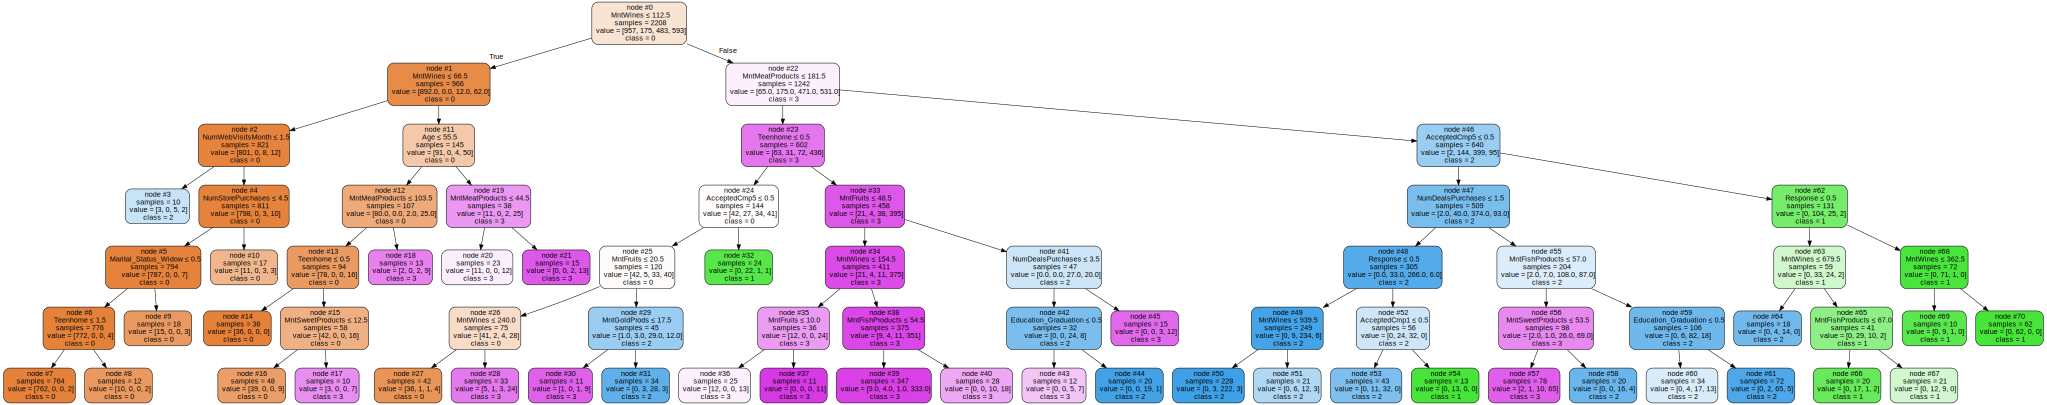

In [94]:
# --- Export Decision Tree --- #
export_graphviz(cluster_tree,
                feature_names=list(features.columns.values),
                out_file='cluster_tree.dot',
                class_names=np.unique(clusters.astype(str)),
                filled=True,
                rounded=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label='all',
                leaves_parallel=False)

with open('cluster_tree.dot') as cluster_tree_image:
    cluster_tree_graph = cluster_tree_image.read()

graphviz.Source(cluster_tree_graph)

In [97]:
# --- Exporting the dataframe with the cluster column) --- #
dataframe_dummy.to_csv('dataframe_clustered.csv') 

**Cluster Interpretation:**
- Cluster 0:
    - Amount spent on wine is low;
    - Tendency of visiting the website at least twice a month;
    - Instore purchases lesser or equal than four over the analyzed period;
    - Not widows;
    - Up to one teenager home.

- Cluster 1:
    - Moderated to elevated amount spent on wines;
    - Low amount spent on fish products;
    - Accepted Campaign 5;
    - ~50% of this cluster has accepted the final campaign (Response);
    - ~10% of this cluster shows evidence of moderate spend both wine and meat, denied Campaign 5, deals purchases e the final campaign (Response), but has accepted Campaign 1.

- Cluster 2:
    - Elevated amount spent on wines;
    - Not impacted by marketing campaigns;

- Cluster 3:
    - Moderated amount spent on wines;
    - At least one teenager home.

## 1.2 - Cluster Analysis 

In [99]:
# --- Cluster Segmentation --- #
cluster_0 = dataframe_dummy[dataframe_dummy['Cluster'] == 0] # Selecting the samples in cluster 0.
cluster_1 = dataframe_dummy[dataframe_dummy['Cluster'] == 1] # Selecting the samples in cluster 1.
cluster_2 = dataframe_dummy[dataframe_dummy['Cluster'] == 2] # Selecting the samples in cluster 2.
cluster_3 = dataframe_dummy[dataframe_dummy['Cluster'] == 3] # Selecting the samples in cluster 3.

In [100]:
# --- Cluster 0 Analysis --- #
cluster_0.describe() # Displaying the statistics of cluster 0.

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age,Batch,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Cluster
count,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.0,957.0,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.0
mean,33537.471264,0.819227,0.406479,49.002090,36.002090,5.007315,22.563218,7.421108,5.183908,15.585162,1.996865,2.050157,0.512017,3.119122,6.523511,0.079415,0.002090,0.0,0.0,0.002090,0.090909,41.292581,2.134796,0.115987,0.055381,0.502612,0.157785,0.168234,0.091954,0.394984,0.245559,0.249739,0.017764,0.0
std,12095.582956,0.479415,0.512276,29.097693,46.902507,7.777835,26.363794,12.387371,7.783662,20.512072,1.389211,1.330992,0.757882,1.012691,1.992854,0.270527,0.045691,0.0,0.0,0.045691,0.287630,10.495071,0.679659,0.320377,0.228843,0.500255,0.364730,0.374270,0.289112,0.489103,0.430643,0.433088,0.132161,0.0
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,25176.000000,1.000000,0.000000,24.000000,7.000000,0.000000,7.000000,1.000000,0.000000,4.000000,1.000000,1.000000,0.000000,3.000000,5.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,34.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,33585.000000,1.000000,0.000000,49.000000,19.000000,2.000000,14.000000,3.000000,2.000000,10.000000,2.000000,2.000000,0.000000,3.000000,7.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,40.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,41145.000000,1.000000,1.000000,76.000000,43.000000,6.000000,25.000000,10.000000,7.000000,20.000000,3.000000,3.000000,1.000000,4.000000,8.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,48.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
max,84047.000000,2.000000,2.000000,99.000000,342.000000,64.000000,230.000000,179.000000,78.000000,262.000000,15.000000,10.000000,5.000000,8.000000,20.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,74.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


**Cluster 0**:
- Cluster Size: 957 out of 2208
- Mean Income ~ 33537.5
- 82% have kids home;
- 40% have teenagers home;
- They spend low amounts of money on any product category mapped by the dataset (Wines, Fruits, Meat Products, Fish Products, Sweet Products, Gold Products))
- 2 deal purchases over the analyzed period;
- 2 web purchases over the analyzed period;
- 0.51 catalog purchases over the analyzed period;
- 3 store purchases over the analyzed period;
- 6.5 web visits per month;
- 41.2 years old;
- 50% of them are graduated;
- 25% of them are single;
- 64% are married or together with someone;

In [101]:
# --- Cluster 1 Analysis --- #
cluster_1.describe() # Displaying the statistics of cluster 1.

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age,Batch,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Cluster
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.0000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.0,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.0
mean,81152.668571,0.034286,0.108571,45.742857,884.674286,55.091429,484.731429,79.674286,63.502857,68.748571,1.022857,5.651429,6.2400,8.102857,3.240000,0.200000,0.405714,0.731429,0.531429,0.131429,0.714286,44.188571,2.011429,0.074286,0.0,0.422857,0.165714,0.337143,0.085714,0.377143,0.285714,0.200000,0.051429,1.0
std,10526.772873,0.182484,0.346884,29.791365,322.382781,48.787631,262.593677,63.859960,51.001113,58.102809,0.677676,2.108735,2.4611,2.706047,1.973852,0.401148,0.492439,0.444488,0.500443,0.338838,0.453050,14.037056,0.694714,0.262988,0.0,0.495431,0.372891,0.474091,0.280745,0.486062,0.453050,0.401148,0.221504,0.0
min,37929.000000,0.000000,0.000000,0.000000,152.000000,0.000000,46.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.0000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,75768.000000,0.000000,0.000000,20.000000,693.000000,21.000000,272.500000,29.500000,24.000000,27.500000,1.000000,4.000000,4.0000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,82347.000000,0.000000,0.000000,40.000000,918.000000,35.000000,464.000000,59.000000,45.000000,45.000000,1.000000,5.000000,6.0000,8.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,42.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,87492.000000,0.000000,0.000000,72.500000,1084.000000,79.500000,720.000000,120.000000,95.000000,96.000000,1.000000,7.000000,8.0000,10.000000,4.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,56.000000,2.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.0
max,105471.000000,1.000000,2.000000,99.000000,1493.000000,185.000000,974.000000,250.000000,194.000000,241.000000,5.000000,11.000000,11.0000,13.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,73.000000,3.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


**Cluster 1:**
- Cluster Size: 175 out of 2208
- Mean Income ~81152.66;
- 3% have kids at home;
- 10% have teenagers at home;
- Buy every 45 days (mean);
- Spent ~885 on wines over the analyzed period;
- Spent ~485 on mean products over the analyzed period
- 1 deal purchase over the analyzed period;
- 5.65 web purchases over the analyzed period;
- 6.24 catalog purchases over the analyzed period;
- 8.10 in store purchases over the analyzed period;
- 3.24 web visis per month;
- 75% of them accepted campaign number 5;
- 50% of them accepted campaign number 1;
- 42% of them are graduated;
- 33% of them are PhDs;
- ~60% of them are maried or together someone;

In [102]:
# --- Cluster 2 Analysis --- #
cluster_2.describe() # Displaying the statistics of cluster 2.

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age,Batch,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Cluster
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.0,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.0
mean,71788.022774,0.062112,0.310559,51.124224,488.072464,70.285714,402.654244,99.821946,70.403727,80.757764,1.677019,5.271222,5.519669,8.645963,3.037267,0.033126,0.022774,0.055901,0.066253,0.0,0.097308,45.925466,2.002070,0.097308,0.002070,0.666667,0.107660,0.126294,0.093168,0.374741,0.225673,0.269151,0.037267,2.0
std,10178.031760,0.258212,0.476450,28.853060,255.218922,49.632688,239.952266,64.864408,51.346401,59.835505,1.573652,2.530917,2.996043,2.944317,1.838573,0.179152,0.149338,0.229968,0.248981,0.0,0.296685,12.380492,0.680185,0.296685,0.045502,0.471893,0.310272,0.332525,0.290969,0.484558,0.418458,0.443979,0.189612,0.0
min,2447.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,65684.500000,0.000000,0.000000,27.000000,292.500000,28.500000,222.500000,47.000000,30.000000,33.000000,1.000000,4.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,36.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
50%,72099.000000,0.000000,0.000000,54.000000,445.000000,61.000000,369.000000,86.000000,58.000000,61.000000,1.000000,5.000000,5.000000,9.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,45.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
75%,78878.000000,0.000000,1.000000,75.500000,631.000000,104.500000,534.500000,149.000000,106.000000,115.500000,2.000000,6.000000,7.000000,11.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,56.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.0
max,113734.000000,2.000000,2.000000,99.000000,1449.000000,199.000000,1725.000000,259.000000,262.000000,249.000000,15.000000,27.000000,28.000000,13.000000,9.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,71.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.0


**Cluster 2:**
- Cluster Size: 483 out of 2208
- Mean Income ~71800.00
- 6% of them have a kid home;
- 31% of them have a teenager home;
- But every 51 days;
- Spent ~488 on wines over the analyzed period;
- Spent ~402.65 on meat products over the analyzed period;
- Spent ~100 on fish products over the analyzed period;
- 1.68 deal purchases over the analyzed period;
- 5.3 web purchases over the analyzed period;
- 5.5 catalog purchases over the analyzed period;
- 8.65 store purchases over the analyzed period;
- 3 web visits per month;
- Overall low impact by marketing campaigns;
- Mean age of 46 years old;
- 67% of them are graduated;
- 64% are married or together someone.

In [103]:
# --- Cluster 3 Analysis --- #
cluster_3.describe() # Displaying the statistics of cluster 3.

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age,Batch,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Cluster
count,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.0,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.0
mean,55991.165261,0.264755,0.942664,48.441821,419.780776,16.332209,114.404722,22.935919,16.325464,51.804384,3.757167,5.944351,2.775717,7.150084,5.860034,0.060708,0.134907,0.008432,0.026981,0.008432,0.121417,50.824621,1.885329,0.045531,0.0,0.399663,0.222597,0.332209,0.139966,0.391231,0.133221,0.281619,0.053963,3.0
std,10839.048824,0.460305,0.419239,28.430636,284.494085,20.644168,87.590946,29.382771,21.854409,51.544839,2.337644,2.576913,1.987788,2.642443,1.850576,0.238996,0.341913,0.091514,0.162166,0.091514,0.326886,9.616441,0.668048,0.208642,0.0,0.490243,0.416341,0.471403,0.347245,0.488438,0.340100,0.450168,0.226135,0.0
min,4428.000000,0.000000,0.000000,0.000000,16.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
25%,48948.000000,0.000000,1.000000,24.000000,198.000000,3.000000,53.000000,4.000000,2.000000,15.000000,2.000000,4.000000,1.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
50%,56253.000000,0.000000,1.000000,49.000000,356.000000,9.000000,92.000000,13.000000,9.000000,34.000000,3.000000,6.000000,2.000000,7.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
75%,63777.000000,1.000000,1.000000,71.000000,584.000000,21.000000,152.000000,32.000000,23.000000,70.000000,5.000000,8.000000,4.000000,9.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.000000,2.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.0
max,93404.000000,2.000000,2.000000,99.000000,1396.000000,138.000000,650.000000,223.000000,157.000000,321.000000,15.000000,25.000000,11.000000,13.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,71.000000,3.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0


**Cluster 3:**
- Cluster Size: 593 out of 2208
- Mean Income ~55991.00
- 26% have kids;
- 94% of them have a teenager home;
- But every 48 days;
- Spent ~420 on wines over the analyzed period;
- Spent ~114.4 on meat products over the analyzed period;
- 3.76 deal purchases over the analyzed period;
- 6 web purchases over the analyzed period;
- 2.77 catalog purchases over the analyzed period;
- 7.15 store purchases over the analyzed period;
- 5.86 web visits per month;
- 13% of them accepted campagin 4;
- Mean age of 51 years old;
- 39% of them are graduated;
- 22% of them have a Master's Degree;
- 33% of them are PhDs
- 67% are married or together someone.
- 14% of them are divorced.

## 2.0 - Marketing Recommendations

### 2.1 - Cluster 0

**Family-Oriented Value Promotions**: Create a marketing campaign that focuses on family-oriented products and budget-friendly deals, emphasizing bulk purchases for families with kids. Offer discounts on essential items that appeal to households with children, such as snacks, beverages, and quick meal solutions.

**Loyalty Program for Budget-Friendly Shoppers**: Develop a loyalty program that rewards customers for their cumulative purchases. Offer points for buying in bulk or for specific product categories that are popular among families, such as meat products and sweet treats, and allow points to be redeemed for family-oriented rewards or discounts.

### 2.2 - Cluster 1
**Exclusive Wine and Gourmet Food Tasting Events**: Host exclusive wine and gourmet food tasting events targeting this cluster, which shows a higher spending on wines and meat products. Provide personalized experiences, such as wine harmonization workshops, to build brand loyalty and encourage higher spending.

**Premium Membership Program**: Introduce a premium membership program that offers members-only discounts and early access to new products, particularly in wine and gourmet categories. Promote exclusivity and tailored offers that appeal to their higher income and purchasing habits.

**Tailored Digital Campaigns**: Utilize targeted email campaigns highlighting products that align with their purchasing behavior. Focus on curated selections of high-quality wines, meat products, and exclusive deals, incorporating insights from past campaign successes.

### 2.3 - Cluster 2
**Health and Wellness Campaign**: Develop a campaign focusing on health and wellness, promoting high-quality meat and fish products. Share recipes and tips for healthy cooking with children and teenagers, encouraging families to purchase more of these products.

**Value-Added Subscription Box**: Create a subscription box service that offers curated selections of wines and meat products, combined with cooking recipes. Emphasize convenience and quality, catering to their moderate purchasing frequency while encouraging a steady revenue stream.

### 2.4 - Cluster 3
**Teen-Focused Marketing Campaign**: Launch a campaign targeting families with teenagers. Highlight products that appeal to this group of people, such as quick meal solutions and snacks. Promote them through social media channels popular among teenagers.

**Family Night Promotions**: Introduce "Family Night" promotions that offer discounts on meal bundles or packages. Encourage families to come in together, offering activities or contests that can engage teenagers while promoting the products.